In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Dataset.csv")

print(df.shape)
print(df.dtypes)

(649, 33)
school         object
sex            object
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu          float64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime    float64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
famrel          int64
freetime      float64
goout           int64
Dalc            int64
health          int64
absences      float64
G1              int64
G2            float64
G3              int64
Feature_1     float64
Feature_2     float64
Feature_3     float64
romantic       object
dtype: object


In [4]:
df.head()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
0,GP,F,U,GT3,A,4,4.0,at_home,teacher,course,...,1,3,4.0,0,11.0,11,18.0,2.0,1.0,no
1,GP,F,U,GT3,T,1,1.0,at_home,other,course,...,1,3,2.0,9,11.0,11,17.0,2.0,1.0,no
2,GP,F,U,LE3,T,1,1.0,at_home,other,other,...,2,3,6.0,12,13.0,12,15.0,NaN,3.0,no
3,GP,F,U,GT3,T,4,2.0,health,services,home,...,1,5,0.0,14,14.0,14,15.0,3.0,1.0,yes
4,GP,F,U,GT3,T,3,3.0,other,other,home,...,1,5,0.0,11,13.0,13,16.0,NaN,2.0,no


## Unknown Feature Analysis (Level 1)

### Feature overview

In [5]:
features = ['Feature_1', 'Feature_2', 'Feature_3']
df[features].describe()

,Feature_1,Feature_2,Feature_3
count,611.000000,603.000000,610.000000
mean,16.747954,1.913765,2.262295
std,1.216812,0.830798,1.285279
min,15.000000,1.000000,1.000000
25%,16.000000,1.000000,1.000000
50%,17.000000,2.000000,2.000000
75%,18.000000,2.000000,3.000000
max,22.000000,4.000000,5.000000


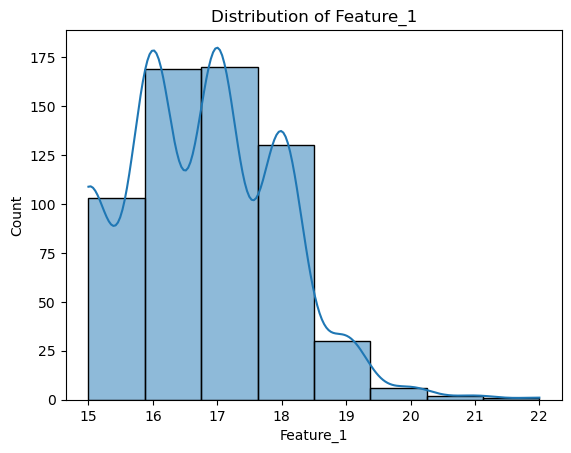

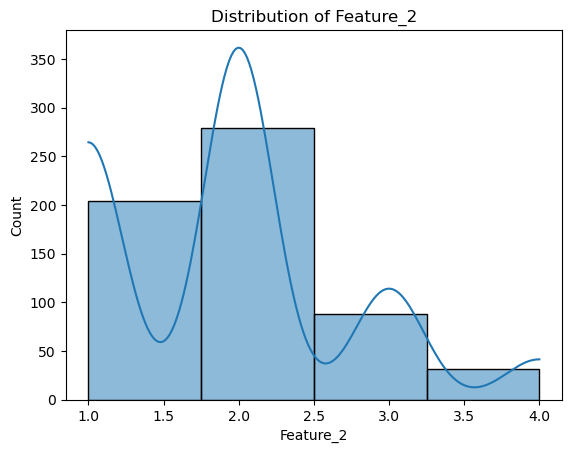

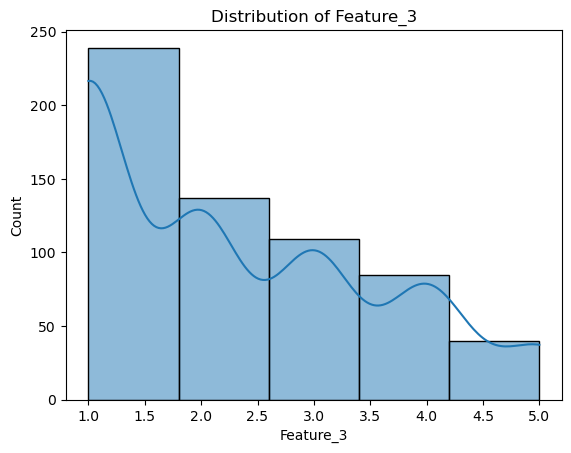

In [13]:
for f in features:
    df2 = df[f].dropna()
    sns.histplot(df2, bins=len(df2.unique()) , kde=True)
    plt.title(f"Distribution of {f}")
    plt.xlabel(f)    
    plt.ylabel("Count")
    plt.show()

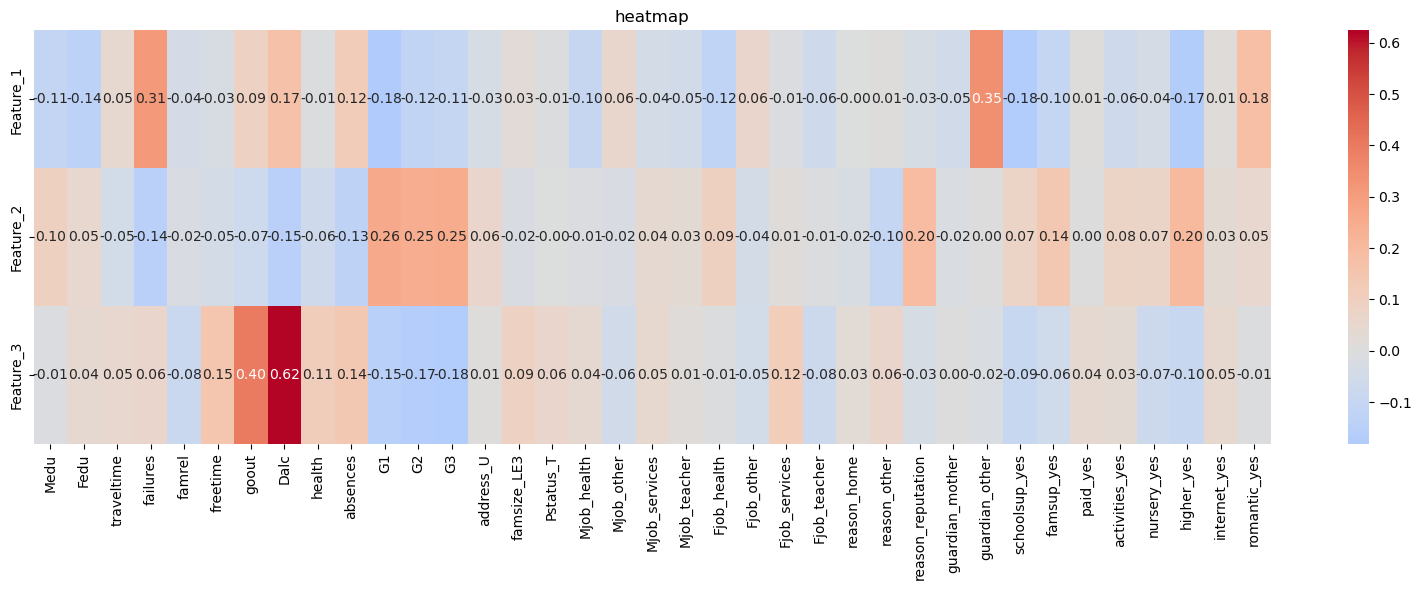

In [40]:
target_features = ['Feature_1', 'Feature_2', 'Feature_3']
other_features = [
    'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
    'guardian', 'traveltime', 'failures', 'schoolsup', 'famsup', 'paid',
    'activities', 'nursery', 'higher', 'internet', 'famrel', 'freetime',
    'goout', 'Dalc', 'health', 'absences', 'G1', 'G2', 'G3', 'romantic'
]

all_features = target_features + other_features
df_subset = df[all_features].copy()
df_encoded = pd.get_dummies(df_subset, drop_first=True)
corr_matrix = df_encoded.corr()
target_vs_others = corr_matrix.loc[target_features, ~corr_matrix.columns.isin(target_features)]

plt.figure(figsize=(16, 6))
sns.heatmap(target_vs_others, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title('heatmap')
plt.tight_layout()

From this graph it can be observed that
feature 1 is higly realted with failures and other as gaurdian and also realted to the dalc and absences
feature 2 is higly realted with the grades and also realted with review for higher academic studies 
feature 3 is highly realted with the Dalc , goout and freetime.

### In depth observation

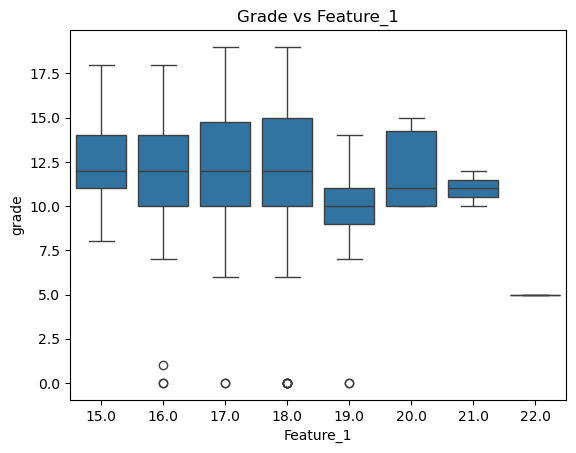

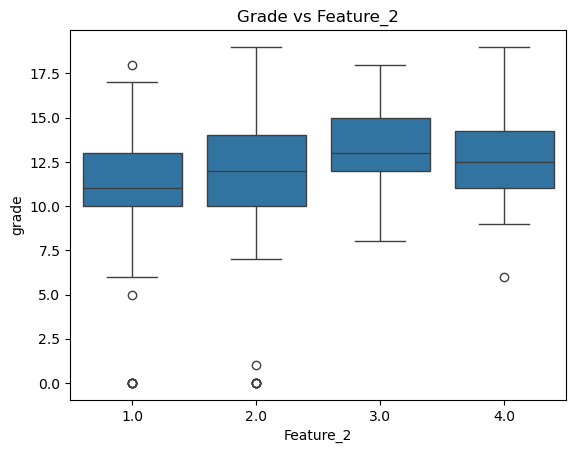

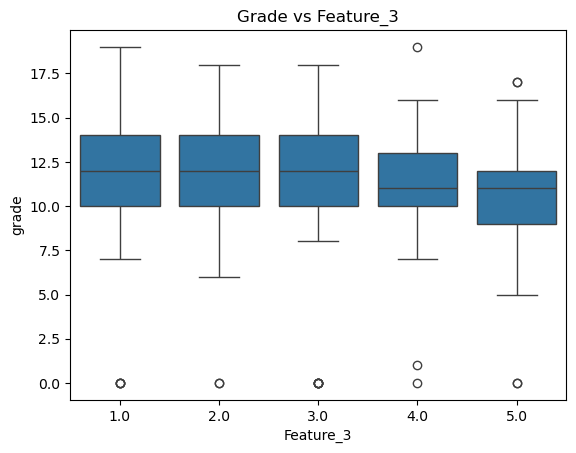

In [15]:
#with final grades
for feat in features:
    sns.boxplot(x=df[feat], y=df['G3'])
    plt.title(f"Grade vs {feat}")
    plt.xlabel(feat)
    plt.ylabel("grade")
    plt.show()

from this graph a realation between the feature 2 and grades can been observed. The value of feature 2 is tend to increase as with increase of academic grades. The median and the maximum both tend to increase here . It can been said that the feature 2 is directly related to some academic stuff.
But the reverse slight negative trend can been observed with the feature 3 . As there is a decrement in the feature 3 with the class grades.

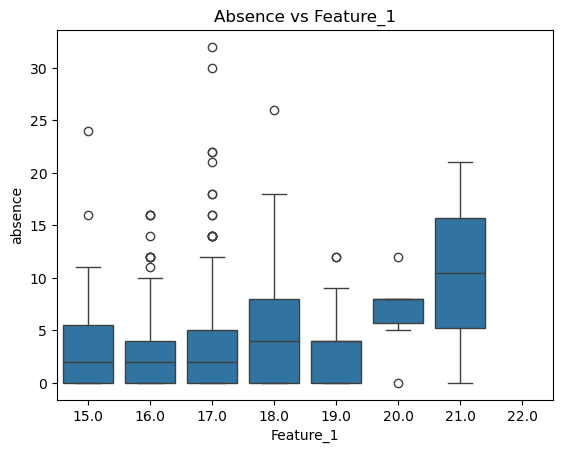

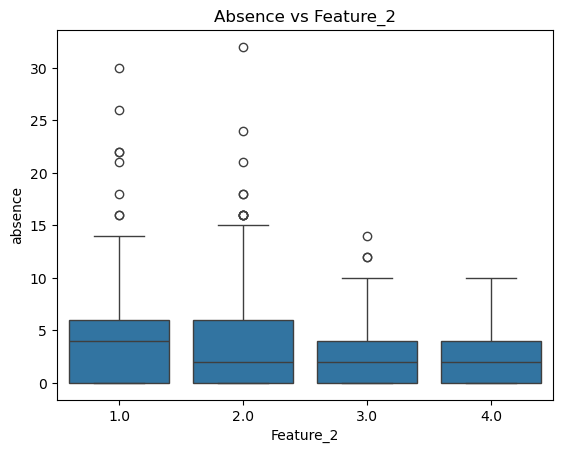

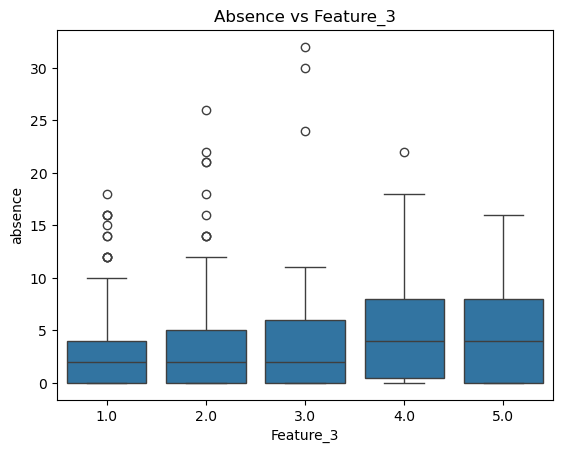

In [16]:
#absence
for feat in features:
    sns.boxplot(x=df[feat], y=df['absences'])
    plt.title(f"Absence vs {feat}")
    plt.xlabel(feat)
    plt.ylabel("absence")
    plt.show()

The feature 2 is realted in a constant manner across the atendence . It does not vary much with the attendence . And the value of attendece for the higher feature 2 is lower.
The feature 3 is inversely realted to the attendece . As the feature 3 increases the attendece generaly tend to decrease . From the above and this box plot we can say that the feature 3 is related to the negative side of academics .

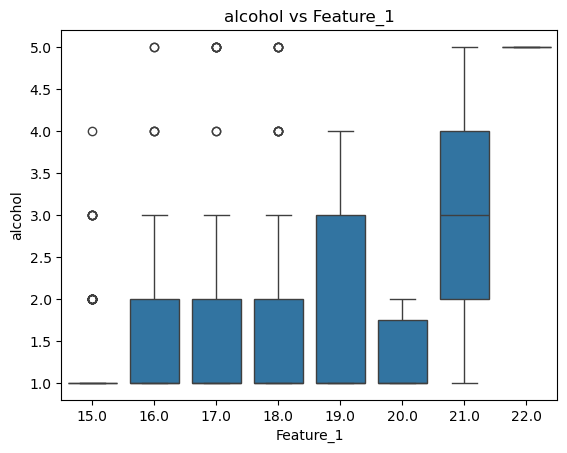

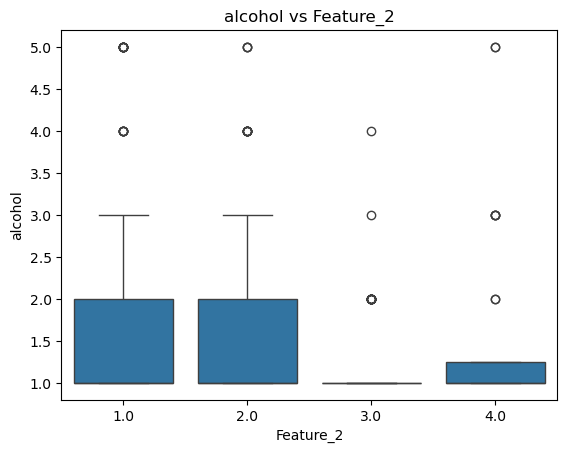

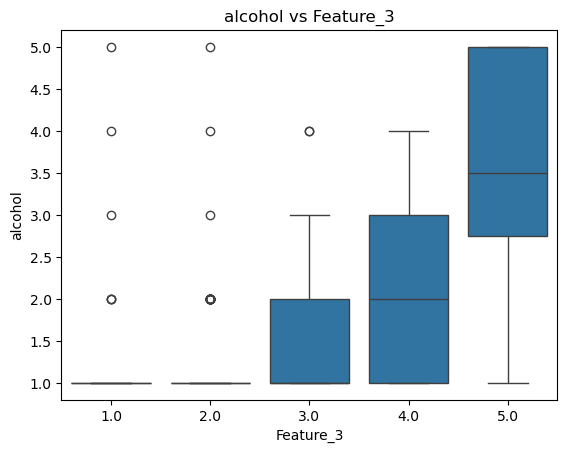

In [17]:
#alcohol
for feat in features:
    sns.boxplot(x=df[feat], y=df['Dalc'])
    plt.title(f"alcohol vs {feat}")
    plt.xlabel(feat)
    plt.ylabel("alcohol")
    plt.show()

Alcohol consuption tend to increase with increase in the feature 1 . generally for the higher value of feature 1 the alcohol consuption is much higher that indicates a kind of jump . This suggests that feature 1 acts as a kind of filter after with there is sudden jump of the alcohol consuption.

Feature 2 has the lesser value of the alochol consuption and is observed to be constatn.

Feature 3 is directly related to the alcohol consuption. More the feature 3 more is the alchol consuption . Again indication it as some negative paramter.

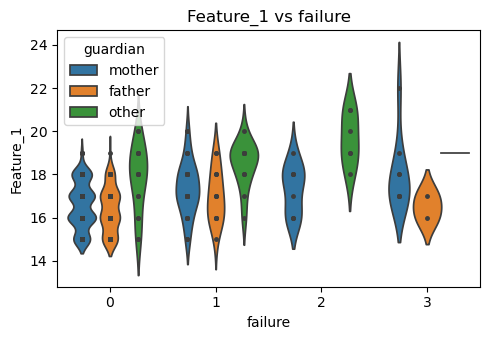

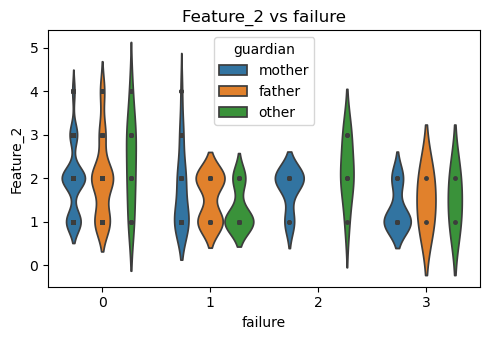

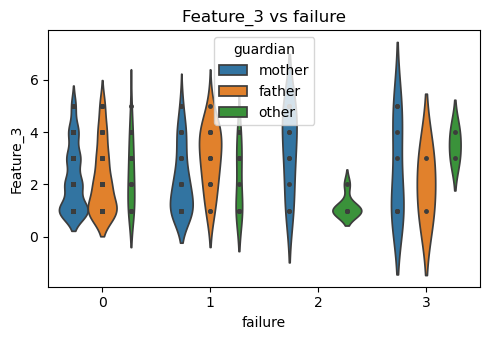

In [ ]:
for feat in features:
    plt.figure(figsize=(5, 3.5))
    sns.violinplot( data=df,  x='failures',y=feat,hue='guardian',inner='point',dodge=True)
    plt.title(feat+ " vs failure")
    plt.xlabel('failure')
    plt.ylabel(feat)
    plt.tight_layout()

Overall including this violen plot we can observe the followin
The feature 1 is realted to values in a filter method . Its means the values suddenly increase after a certain limit of the the feature 1 . And the higher value of feature 1 have lesser family size and higher go out . Feature 1 seem to represent the age of person

Feature 2 is realted with the academic and good behaviour . Overall it seem to be some kind of academic involvement.

Feature 3 is realted to goout and alcohol consuption a lot .It seems to be related with the social exposure.

Feature 1 : Age  
Feature 2 : Academic Involvement  
Feature 3 : Social Exposure

# Imputation making (Level 2)

In [43]:
#mission value search
cnt = df.isnull().sum()
print("Missing value")
print(cnt[cnt>0])

Missing value
famsize       50
Fedu          73
traveltime    73
higher        76
freetime      45
absences      69
G2            35
Feature_1     38
Feature_2     46
Feature_3     39
dtype: int64


In [49]:
#famsize
def imp_fam(row):
    if pd.notna(row['famsize']):
        return row['famsize']
    if pd.isna(row['famrel']):
        return df['famsize'].mode()[0]
    return "LE3" if row['famrel'] < 3 else "GT3"
df['famsize'] = df.apply(imp_fam, axis=1)

#fedu
fedu_n = df['Fedu'].median()
df['Fedu'] = df['Fedu'].fillna(fedu_n)

#travel time
traveltime_n = df['traveltime'].median()
df['traveltime'] = df['traveltime'].fillna(traveltime_n)

#higher
higher_e = df['higher'].mode()[0]
df['higher'] = df['higher'].fillna(higher_e)

#freetime
freetime_n = df['freetime'].median()
df['freetime'] = df['freetime'].fillna(freetime_n)

#absences
absences_n = df['absences'].median()
df['absences'] = df['absences'].fillna(absences_n)

#G2
g2_n = df['G2'].median()
df['G2'] = df['G2'].fillna(g2_n)

#feature 1 (age)
age_n = df['Feature_1'].median()
df['Feature_1'] = df['Feature_1'].fillna(age_n)

#feature 2 (academics)
acad_n = df['Feature_2'].median()
df['Feature_2'] = df['Feature_2'].fillna(acad_n)

#feature 3 (social exposure)
socimp_e = df['Feature_3'].mode()[0]
df['Feature_3'] = df['Feature_3'].fillna(socimp_e)

In [46]:
cnt = df.isnull().sum()
print("Missing value")
print(cnt[cnt>0])

Missing value
Series([], dtype: int64)


### Argument for selecting each of the modeling method  
Famsize - if famrel<3 then LT3 else GT3 family size  
Fedu - keeps the central trend on an orderly scale , strong for outlers  
Travel time - catches the typical travel category. Median avoids distortive discomfort groups.  
Higher - binary filler with majority course one two. Reduces variance  
free time -protects the central ranking. Likert strong for scale  
Absence - preserves central tendency    
G2 - holds a specific character without removing the outlier   
Function 1 (age) - Median is robust to outliers and preserves the central trend  
Function 2 (academic exposure) -maintains the center area of ​​the discreet scale  
Function 3 (social exposure) -  Fills with the majority class to keep the balance of students

# Exploratory Insight Report (Level 3)

#### 1. Does parental education influence whether a student is in a romantic relationship?

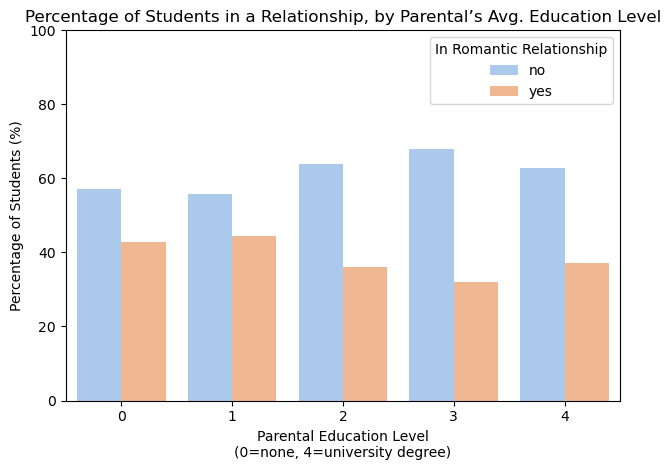

In [69]:
df['avg_edu'] = ((df['Medu'] + df['Fedu']) / 2).round().astype(int)
df['avg_edu'] = df['avg_edu'].clip(lower=0, upper=4)

grouped = (df.groupby(['avg_edu', 'romantic']).size().unstack(fill_value=0))
grouped_pct = grouped.div(grouped.sum(axis=1), axis=0) * 100

grouped_pct = grouped_pct.reset_index().melt(
    id_vars='avg_edu',
    value_vars=['no', 'yes'],
    var_name='Romantic_Status',
    value_name='Percentage'
)

sns.barplot(
    data=grouped_pct,
    x='avg_edu',
    y='Percentage',
    hue='Romantic_Status',
    palette='pastel'
)
plt.title('Percentage of Students in a Relationship, by Parentalʼs Avg. Education Level')
plt.xlabel('Parental Education Level\n(0=none, 4=university degree)')
plt.ylabel('Percentage of Students (%)')
plt.legend(title='In Romantic Relationship')
plt.ylim(0, 100)
plt.tight_layout()

Student with lower parental education are higher in romantic relationship . This can be observed due to higher level of supervision and other engaging content provided by them to their children. This also corelates to the family values provided to them , that influence their teenage dating behaviour.

#### 2. Do students in a romantic relationship report different family‐relationship quality than those not?

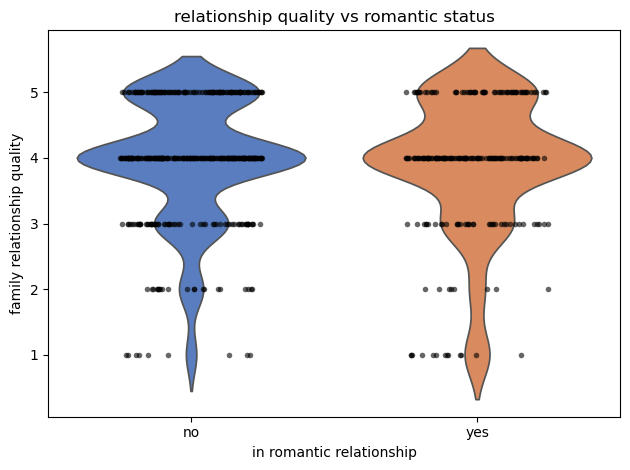

In [ ]:
sns.violinplot(
    data=df,
    x='romantic',
    y='famrel',
    hue='romantic',
    legend=False,
    inner=None,
    palette='muted'
)
sns.stripplot(
    data=df,
    x='romantic',
    y='famrel',
    jitter=0.25,
    size=4,
    color='black',
    alpha=0.6
)
plt.title('relationship quality vs romantic status')
plt.xlabel('in romantic relationship')
plt.ylabel('family relationship quality')
plt.tight_layout()
plt.show()

Wider sections mean more students report that score and Narrow means few. Both the violen plots are nearly same but we can observe that the violen plot for the yes is more wider at the higher family relationship quality that symbolise ,students who report being in a romantic relationship tend to have slightly lower family‐relationship quality scores than those who are not.

#### 3. How do school absences vary by romantic status, and what is their relationship with final grade ? In other words, do romantic students miss more classes, and does that correlate with lower grades?

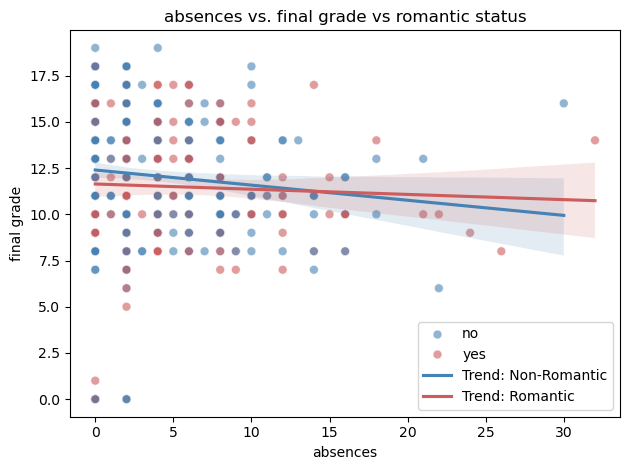

In [73]:
sns.scatterplot(
    data=df,
    x='absences',
    y='G3',
    hue='romantic',
    palette={'no':'steelblue', 'yes':'indianred'},
    alpha=0.6,
    s=40
)
sns.regplot(
    data=df[df['romantic']=='no'],
    x='absences',
    y='G3',
    scatter=False,
    color='steelblue',
    label='Trend: Non‐Romantic'
)
sns.regplot(
    data=df[df['romantic']=='yes'],
    x='absences',
    y='G3',
    scatter=False,
    color='indianred',
    label='Trend: Romantic'
)
plt.title('absences vs. final grade vs romantic status')
plt.xlabel('absences')
plt.ylabel('final grade')
plt.legend()
plt.tight_layout()
plt.show()

We can observe that the slope of trend line of non romantic student is higher as compared to the slope for the trend of the Romantic Student. So for the non Romantic student we have a higer final grade and a lesser absence.Hence absences reflects the  clash of dating schedule and the class schedule .

#### 4. Is there a difference in the number of absences between students who have internet at home and those who do not?

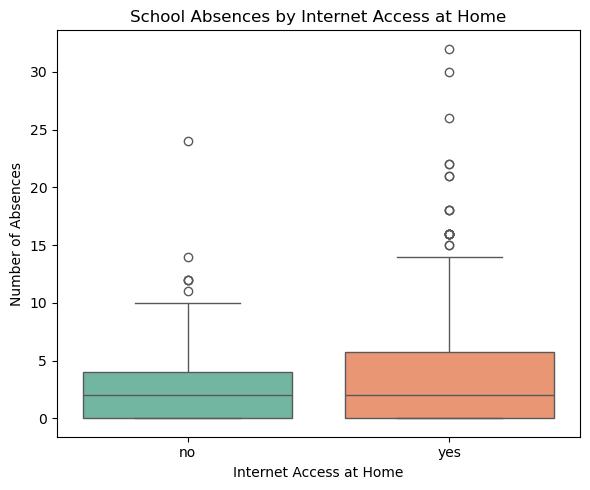

In [63]:
plt.figure(figsize=(6, 5))
sns.boxplot(
    data=df,
    x='internet',
    hue = 'internet',
    legend=False,
    y='absences',
    palette='Set2'
)
plt.title('School Absences by Internet Access at Home')
plt.xlabel('Internet Access at Home')
plt.ylabel('Number of Absences')
plt.tight_layout()
plt.show()

The spread line for the no is lower as compared to the student having internet access at home . And ther are a lot of outliers student having the access to the internet and have a very large number of absences at school . Hence students without internet at home tend to have fewer absences, whereas those with internet show a wider range of missed days.

#### 5. Do students who participate in extracurricular activities have different final grades than those who do not?

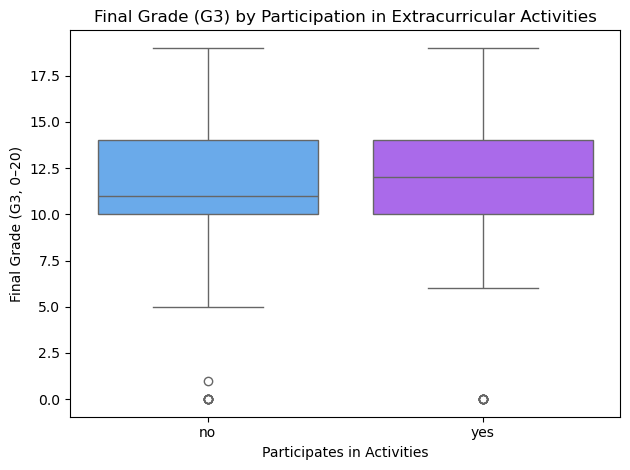

In [64]:
sns.boxplot(
    data=df,
    x='activities',
    hue = 'activities',
    legend=False,
    y='G3',
    palette='cool'
)
plt.title('Final Grade (G3) by Participation in Extracurricular Activities')
plt.xlabel('Participates in Activities')
plt.ylabel('Final Grade (G3, 0–20)')
plt.tight_layout()

The median line for the yes grade is higher reflecting that the students who participate in the extracurricular activity tend to have more involvement in academics also . Thus students who participate in extracurricular activities tend to have slightly higher final grades and exhibit less variability, suggesting a positive link between balanced involvement and academic success.

#### 6. How does weekday alcohol use relate to the amount of free time?

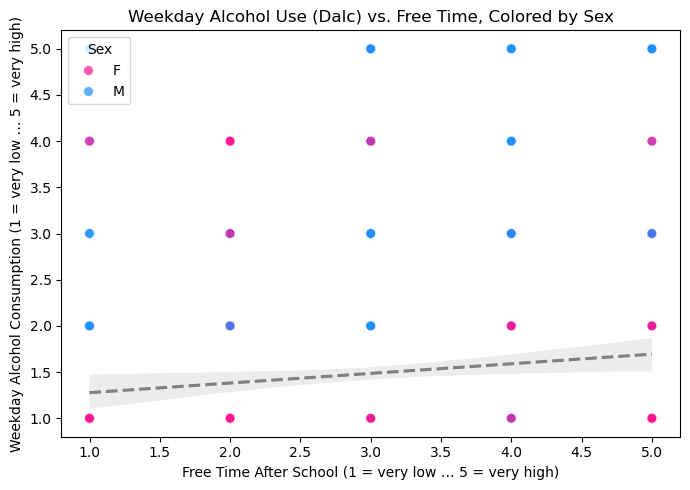

In [59]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df,
    x='freetime',
    y='Dalc',
    hue='sex',
    palette={'F':'deeppink', 'M':'dodgerblue'},
    alpha=0.7,
    s=50
)
sns.regplot(
    data=df,
    x='freetime',
    y='Dalc',
    scatter=False,
    color='gray',
    line_kws={'linestyle':'--'}
)
plt.title('Weekday Alcohol Use (Dalc) vs. Free Time, Colored by Sex')
plt.xlabel('Free Time After School (1 = very low … 5 = very high)')
plt.ylabel('Weekday Alcohol Consumption (1 = very low … 5 = very high)')
plt.legend(title='Sex', loc='upper left')
plt.tight_layout()
plt.show()

Students with slightly more free time tend to drink a little more, but the relationship is not strong . Male point cluters nera the higher values for the higher free time than the females clusters suggesting male with more free time tend to drink more . Hence there is a mild positive association between after‐school free time and weekday alcohol consumption.

#### 7. How do travel time, internet access, and final grade interact? In other words, do students with longer commutes and no internet at home tend to have lower final grades compared to shorter‐commute students who do have internet?

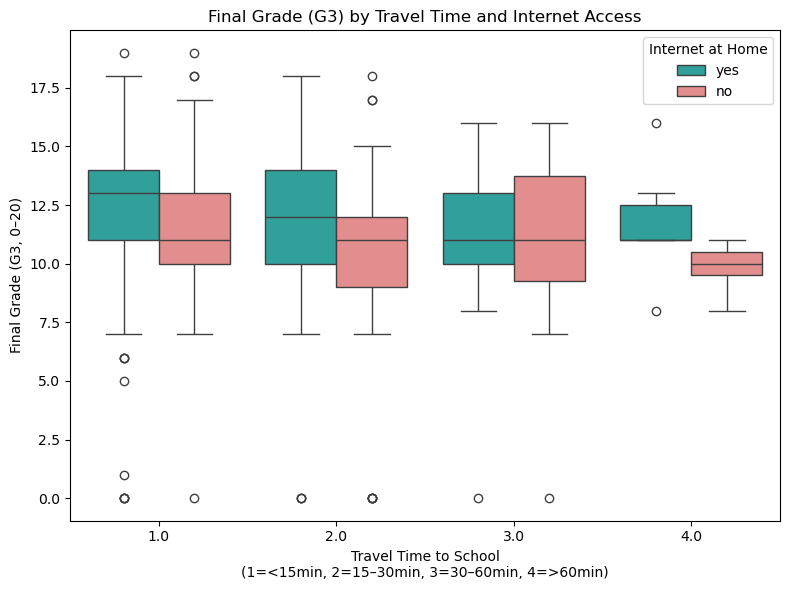

In [65]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='traveltime',
    y='G3',
    hue='internet',           # split each traveltime category by internet access
    palette={'no':'lightcoral', 'yes':'lightseagreen'}
)
plt.title('Final Grade (G3) by Travel Time and Internet Access')
plt.xlabel('Travel Time to School\n(1=<15min, 2=15–30min, 3=30–60min, 4=>60min)')
plt.ylabel('Final Grade (G3, 0–20)')
plt.legend(title='Internet at Home')
plt.tight_layout()
plt.show()

Both shorter travel time and having internet access are associated with higher and more consistent final grades . And those with the higher travel time and no internet acces have lower grades . This refrence the importance of internet in the modern era of education along with the importacne of student's time.

#### 8. How do family educational support, extra paid classes, and first‐term grade interact? In other words, among students who do or do not receive family support, does taking paid classes correspond to a higher first‐term grade?

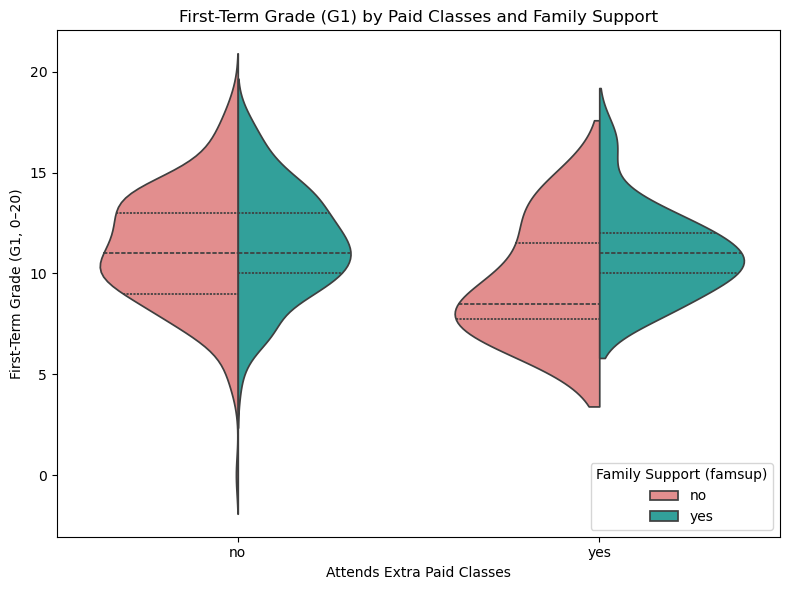

In [67]:
plt.figure(figsize=(8, 6))
sns.violinplot(
    data=df,
    x='paid',
    y='G1',
    hue='famsup',
    split=True,
    inner='quartile',
    palette={'no':'lightcoral', 'yes':'lightseagreen'}
)
plt.title('First-Term Grade (G1) by Paid Classes and Family Support')
plt.xlabel('Attends Extra Paid Classes')
plt.ylabel('First-Term Grade (G1, 0–20)')
plt.legend(title='Family Support (famsup)')
plt.tight_layout()
plt.show()

Students with famsup = yes outscore those with famsup = no neither group takes paid classes , observed from the median line.Those lacking both are clustered at the bottom .There is a thin strech of students without family support having lower final grades marks. Hence the additional family support along with the extra paid classes lead to the overall improvement of the final grades.

# Relationship prediction model (Level 4)

In [76]:
data = df.copy()
data['romantic_flag'] = data['romantic'].map({'no': 0, 'yes': 1})
data.drop(columns=['romantic'], inplace=True)
cat_cols = [
    'sex', 'address', 'famsize', 'Pstatus',
    'Mjob', 'Fjob', 'reason', 'guardian',
    'schoolsup', 'famsup', 'paid', 'activities',
    'nursery', 'higher', 'internet'
]
data_encoded = pd.get_dummies(data, columns=cat_cols, drop_first=True)

In [77]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop(columns=['romantic_flag', 'school'])  # drop 'school' if desired
y = data_encoded['romantic_flag']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size: ", X_test.shape[0])
print("Train class distribution:\n", y_train.value_counts(normalize=True))
print("Test class distribution:\n", y_test.value_counts(normalize=True))

Train size: 519
Test size:  130
Train class distribution:
 romantic_flag
0    0.631985
1    0.368015
Name: proportion, dtype: float64
Test class distribution:
 romantic_flag
0    0.630769
1    0.369231
Name: proportion, dtype: float64


In [78]:
from sklearn.preprocessing import StandardScaler
numeric_cols = [
    'Medu', 'Fedu', 'traveltime', 'failures',
    'famrel', 'freetime', 'goout', 'Dalc', 'health', 'absences',
    'G1', 'G2', 'G3',
    'Feature_1', 'Feature_2', 'Feature_3'
]
scaler = StandardScaler()
X_train_num = X_train[numeric_cols]
scaler.fit(X_train_num)
X_train_scaled = X_train.copy()
X_train_scaled[numeric_cols] = scaler.transform(X_train_num)

X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("\nScaled training numeric summary:")
print(pd.DataFrame(X_train_scaled[numeric_cols]).describe().loc[['mean', 'std']])



Scaled training numeric summary:
              Medu          Fedu    traveltime      failures        famrel  \
mean -1.471741e-16  3.422653e-17 -1.882459e-17 -2.566990e-17  1.574420e-16   
std   1.000965e+00  1.000965e+00  1.000965e+00  1.000965e+00  1.000965e+00   

          freetime         goout          Dalc        health      absences  \
mean -2.079262e-16  2.224724e-17 -5.133979e-17  1.523081e-16  1.882459e-17   
std   1.000965e+00  1.000965e+00  1.000965e+00  1.000965e+00  1.000965e+00   

                G1            G2            G3     Feature_1     Feature_2  \
mean  2.310291e-16  5.133979e-17  1.711326e-16 -7.050665e-16 -6.160775e-17   
std   1.000965e+00  1.000965e+00  1.000965e+00  1.000965e+00  1.000965e+00   

         Feature_3  
mean -5.647377e-17  
std   1.000965e+00  


In [79]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='liblinear',
    class_weight='balanced', 
    random_state=42,
    max_iter=1000
)

lr.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   solver='liblinear')

In [80]:
y_pred_lr = lr.predict(X_test_scaled)

y_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]


In [81]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_auc_score, roc_curve
)
accuracy_lr  = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr    = recall_score(y_test, y_pred_lr)
f1_lr        = f1_score(y_test, y_pred_lr)
roc_auc_lr   = roc_auc_score(y_test, y_proba_lr)

cm_lr = confusion_matrix(y_test, y_pred_lr)

print("Logistic Regression Metrics:")
print(f" Accuracy : {accuracy_lr:.3f}")
print(f" Precision: {precision_lr:.3f}")
print(f" Recall   : {recall_lr:.3f}")
print(f" F1‐Score : {f1_lr:.3f}")
print(f" ROC AUC  : {roc_auc_lr:.3f}")
print("\nConfusion Matrix (rows=true, columns=predicted):")
print(cm_lr)


Logistic Regression Metrics:
 Accuracy : 0.577
 Precision: 0.443
 Recall   : 0.562
 F1‐Score : 0.495
 ROC AUC  : 0.615

Confusion Matrix (rows=true, columns=predicted):
[[48 34]
 [21 27]]


Logistic Regression Metrics:  
 Accuracy : 0.577  
 Precision: 0.443  
 Recall   : 0.562  
 F1‐Score : 0.495  
 ROC AUC  : 0.615  

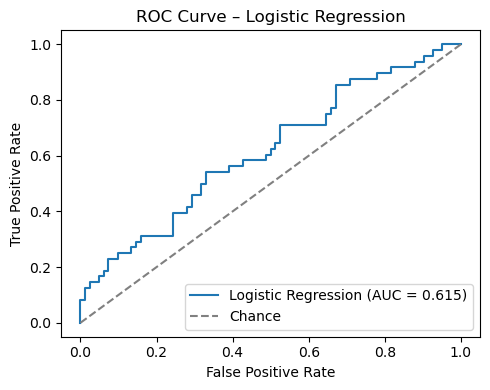

In [ ]:
#ROC Plot
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_proba_lr)

plt.figure(figsize=(5, 4))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.3f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Logistic Regression')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [83]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [84]:
y_pred_rf = rf.predict(X_test)

y_proba_rf = rf.predict_proba(X_test)[:, 1]


In [85]:
accuracy_rf  = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf    = recall_score(y_test, y_pred_rf)
f1_rf        = f1_score(y_test, y_pred_rf)
roc_auc_rf   = roc_auc_score(y_test, y_proba_rf)

cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Metrics:")
print(f" Accuracy : {accuracy_rf:.3f}")
print(f" Precision: {precision_rf:.3f}")
print(f" Recall   : {recall_rf:.3f}")
print(f" F1‐Score : {f1_rf:.3f}")
print(f" ROC AUC  : {roc_auc_rf:.3f}")
print("\nConfusion Matrix (rows=true, columns=predicted):")
print(cm_rf)


Random Forest Metrics:
 Accuracy : 0.615
 Precision: 0.444
 Recall   : 0.167
 F1‐Score : 0.242
 ROC AUC  : 0.568

Confusion Matrix (rows=true, columns=predicted):
[[72 10]
 [40  8]]


Random Forest Metrics:  
 Accuracy : 0.615  
 Precision: 0.444  
 Recall   : 0.167  
 F1‐Score : 0.242  
 ROC AUC  : 0.568  

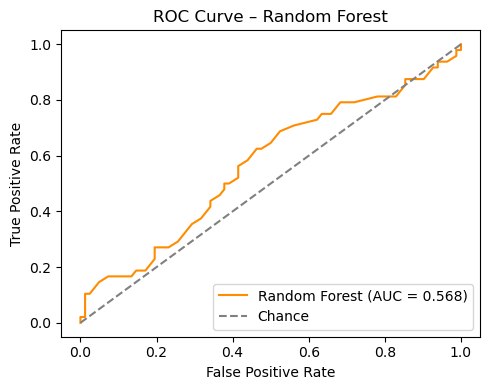

In [86]:
#roc
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(5, 4))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.3f})", color='darkorange')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Random Forest')
plt.legend(loc='lower right')
plt.tight_layout()

In [87]:
#feature imp
feat_imp_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
})

feat_imp_df_sorted = feat_imp_df.sort_values(by='importance', ascending=False).reset_index(drop=True)

feat_imp_df_sorted.head(10)


,feature,importance
0,G1,0.062497
1,G2,0.058930
2,G3,0.057638
3,absences,0.051498
4,Feature_1,0.048636
5,goout,0.045464
6,health,0.040687
7,freetime,0.040141
8,Feature_3,0.039582
9,famrel,0.038585


In [88]:
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
svc = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    class_weight='balanced',
    probability=True,  
    random_state=42
)

svc.fit(X_train_scaled, y_train)


SVC(class_weight='balanced', probability=True, random_state=42)

In [89]:
y_pred_svm = svc.predict(X_test_scaled)
y_proba_svm = svc.predict_proba(X_test_scaled)[:, 1]

In [90]:
accuracy_svm  = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm    = recall_score(y_test, y_pred_svm)
f1_svm        = f1_score(y_test, y_pred_svm)
roc_auc_svm   = roc_auc_score(y_test, y_proba_svm)

cm_svm = confusion_matrix(y_test, y_pred_svm)

print("SVM Metrics:")
print(f" Accuracy : {accuracy_svm:.3f}")
print(f" Precision: {precision_svm:.3f}")
print(f" Recall   : {recall_svm:.3f}")
print(f" F1‐Score : {f1_svm:.3f}")
print(f" ROC AUC  : {roc_auc_svm:.3f}")
print("\nConfusion Matrix (rows=true, columns=predicted):")
print(cm_svm)


SVM Metrics:
 Accuracy : 0.585
 Precision: 0.450
 Recall   : 0.562
 F1‐Score : 0.500
 ROC AUC  : 0.611

Confusion Matrix (rows=true, columns=predicted):
[[49 33]
 [21 27]]


SVM Metrics:  
 Accuracy : 0.585  
 Precision: 0.450  
 Recall   : 0.562  
 F1‐Score : 0.500  
 ROC AUC  : 0.611  

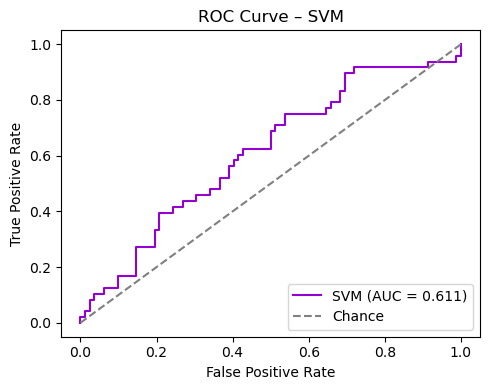

In [92]:
#roc curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)

plt.figure(figsize=(5, 4))
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_svm:.3f})", color='darkviolet')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – SVM')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [93]:
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Accuracy' : [accuracy_lr, accuracy_rf, accuracy_svm],
    'Precision': [precision_lr, precision_rf, precision_svm],
    'Recall'   : [recall_lr, recall_rf, recall_svm],
    'F1‐Score' : [f1_lr, f1_rf, f1_svm],
    'ROC AUC'  : [roc_auc_lr, roc_auc_rf, roc_auc_svm]
})

# Round for readability
metrics_df[['Accuracy','Precision','Recall','F1‐Score','ROC AUC']] = metrics_df[
    ['Accuracy','Precision','Recall','F1‐Score','ROC AUC']
].round(3)

metrics_df

,Model,Accuracy,Precision,Recall,F1‐Score,ROC AUC
0,Logistic Regression,0.577,0.443,0.562,0.495,0.615
1,Random Forest,0.615,0.444,0.167,0.242,0.568
2,SVM,0.585,0.450,0.562,0.500,0.611


# Model Reasoning and Interpretation (Level 5)

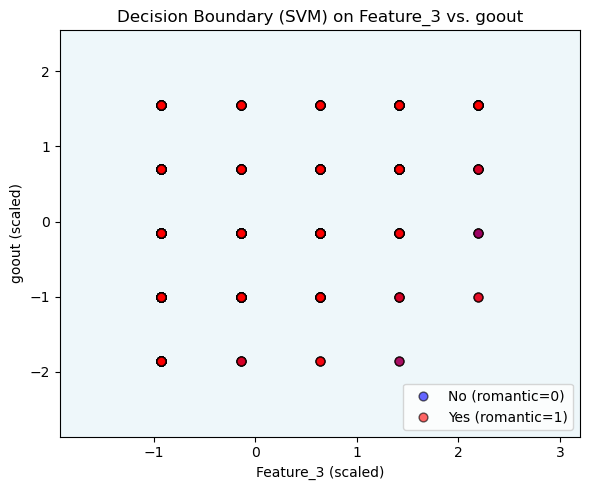

In [94]:
X_2d = df[['Feature_3', 'goout']].copy()
y_2d = df['romantic'].map({'no': 0, 'yes': 1})

scaler_2d = StandardScaler()
X_2d_scaled = scaler_2d.fit_transform(X_2d)

from sklearn.svm import SVC
svc_2d = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', probability=True, random_state=42)
svc_2d.fit(X_2d_scaled, y_2d)

xx, yy = np.meshgrid(
    np.linspace(X_2d_scaled[:, 0].min() - 1, X_2d_scaled[:, 0].max() + 1, 300),
    np.linspace(X_2d_scaled[:, 1].min() - 1, X_2d_scaled[:, 1].max() + 1, 300)
)
grid = np.c_[xx.ravel(), yy.ravel()]

Z = svc_2d.predict_proba(grid)[:, 1].reshape(xx.shape)

plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, colors=['lightblue', 'lightcoral'])

plt.scatter(
    X_2d_scaled[y_2d == 0, 0], X_2d_scaled[y_2d == 0, 1],
    label='No (romantic=0)', c='blue', edgecolor='k', alpha=0.6, s=40
)
plt.scatter(
    X_2d_scaled[y_2d == 1, 0], X_2d_scaled[y_2d == 1, 1],
    label='Yes (romantic=1)', c='red', edgecolor='k', alpha=0.6, s=40
)

plt.xlabel('Feature_3 (scaled)')
plt.ylabel('goout (scaled)')
plt.title('Decision Boundary (SVM) on Feature_3 vs. goout')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [96]:
import shap

background = X_train_scaled.sample(n=200, random_state=42).values

explainer = shap.KernelExplainer(svc.predict_proba, background)

X_shap = X_test_scaled.sample(n=200, random_state=42)

shap_values = explainer.shap_values(X_shap, nsamples=200)  

X_shap_df = pd.DataFrame(X_shap, columns=X_train_scaled.columns)

plt.figure(figsize=(8, 6))
shap.summary_plot(shap_values[1], X_shap_df, show=False)
plt.title('SHAP Summary (Global) – SVM Predictions for "Yes"')
plt.tight_layout()
plt.show()


Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


ValueError: Cannot take a larger sample than population when 'replace=False'

In [97]:
yes_indices = y_test[y_test == 1].index
if len(yes_indices) > 0:
    idx = yes_indices[0]
    x_instance = X_test_scaled.loc[[idx]]
    x_instance_df = pd.DataFrame(x_instance, columns=X_train_scaled.columns)


    shap_vals_instance = explainer.shap_values(x_instance_df, nsamples=200)

    plt.figure(figsize=(8, 4))
    shap.force_plot(
        explainer.expected_value[1],
        shap_vals_instance[1][0],
        x_instance_df.iloc[0, :],
        matplotlib=True,
        show=False
    )
    plt.title('SHAP Force Plot for One “Yes” Student')
    plt.tight_layout()
    plt.show()
else:
    print("No 'yes' examples found in the test set.")


  0%|          | 0/1 [00:00<?, ?it/s]

IndexError: index 1 is out of bounds for axis 0 with size 1

<Figure size 800x400 with 0 Axes>